Set up scalable plots
Select region, aggregate regions, facet regions

- [x] Generation stacked area plot
- [x] Generation Duration curve
- [x] Generation Histogram
- [ ] Storage level
- [ ] Storage generation/charging duration curve
- [ ] Load correlation matrix
- [ ] FFT/Power spectrum
- [ ] Sankey diagram
- [ ] Map
- [ ] Duals


Which variables are interesting?
- Installed capacity/storage capacity: energy_cap/storage_cap
- Produced energy: carrier_prod
- Energy demand: carrier_con
- Storage charging/discharging: ?
- Storage content: storage
- Curtailment: unmet_supply?
- Duals: 

In [3]:
%reload_ext autoreload
%autoreload 2
import plotnine as pn
import pandas as pd
import calliope

In [4]:
model_name = '1_generation_consumption'
model = calliope.Model(f'../{model_name}/model.yaml')
model.run()

/home/jlauner/mambaforge/envs/sector-coupled-euro-calliope-analysis/lib/python3.8/site-packages/calliope/exceptions.py:60: ModelWarning:

Possible issues found during model processing:
 * Model configuration specifies calliope_version=0.6.10, but you are running 0.6.8. Proceed with caution!



In [42]:
data = model.results.resource_con.to_pandas().T
data

loc_techs_supply_plus,region1-1::csp,region1-2::csp,region1-3::csp
timesteps,,,
2005-01-01 00:00:00,0.0,0.0,0.0
2005-01-01 01:00:00,0.0,0.0,0.0
2005-01-01 02:00:00,0.0,0.0,0.0
2005-01-01 03:00:00,0.0,0.0,0.0
2005-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...
2005-01-05 19:00:00,0.0,0.0,0.0
2005-01-05 20:00:00,0.0,0.0,0.0
2005-01-05 21:00:00,0.0,0.0,0.0


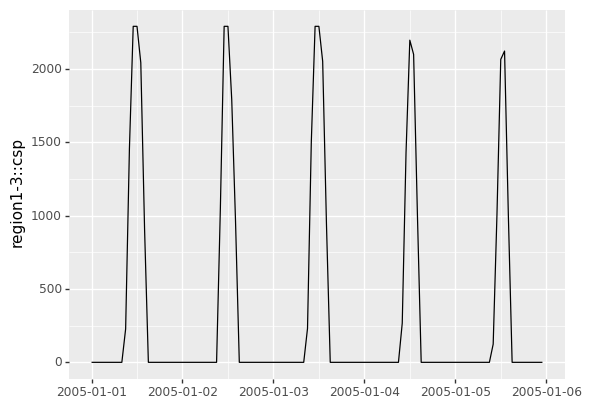

<ggplot: (8749660478745)>

In [43]:
(pn.ggplot(data, pn.aes(x=data.index, y=data["region1-3::csp"]))
 + pn.geom_line() 
 )

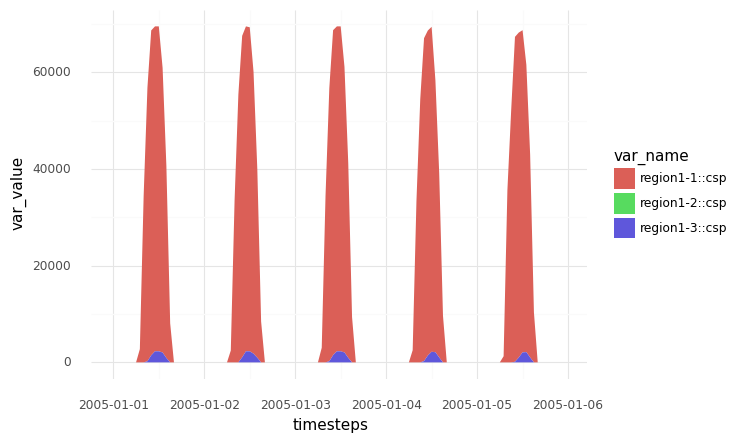

<ggplot: (8749660828094)>

In [44]:
melted = data.reset_index()
melted = pd.melt(melted, id_vars="timesteps", value_vars=data.columns, var_name="var_name", value_name="var_value")

(
    pn.ggplot(melted, pn.aes(x="timesteps", y="var_value", fill="var_name"))
    + pn.geom_area(position="stack")
    + pn.scale_datetime("1 week")
    + pn.theme_minimal()
)

        locs techs           timesteps  resource_con
0  region1-1   csp 2005-01-01 00:00:00           0.0
1  region1-1   csp 2005-01-01 01:00:00           0.0
2  region1-1   csp 2005-01-01 02:00:00           0.0
3  region1-1   csp 2005-01-01 03:00:00           0.0
4  region1-1   csp 2005-01-01 04:00:00           0.0
            timesteps techs  resource_con
0 2005-01-01 00:00:00   csp           0.0
1 2005-01-01 01:00:00   csp           0.0
2 2005-01-01 02:00:00   csp           0.0
3 2005-01-01 03:00:00   csp           0.0
4 2005-01-01 04:00:00   csp           0.0


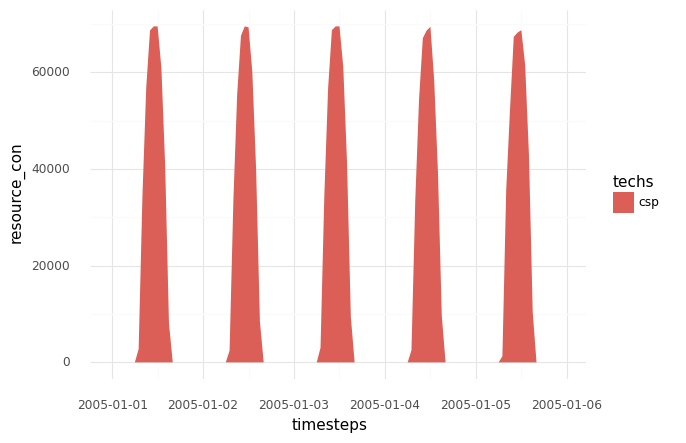

<ggplot: (8749658874995)>

In [111]:
# Dispatch plot

# load data
data = model.get_formatted_array("resource_con", index_format="multiindex").to_dataframe().reset_index()
print(data.head())

# select region
# data = data[data.locs == "region1-3"]

# aggregate regions
data = data.groupby(["timesteps", "techs"]).sum().reset_index()
print(data.head())

(
    pn.ggplot(data, pn.aes(x="timesteps", y="resource_con", fill="techs"))
    + pn.geom_area(position="stack")
    # + pn.scale_datetime("1 week")
    + pn.theme_minimal()
)

        locs techs           timesteps  resource_con
0  region1-1   csp 2005-01-01 00:00:00           0.0
1  region1-1   csp 2005-01-01 01:00:00           0.0
2  region1-1   csp 2005-01-01 02:00:00           0.0
3  region1-1   csp 2005-01-01 03:00:00           0.0
4  region1-1   csp 2005-01-01 04:00:00           0.0
        locs techs           timesteps  resource_con
0  region1-1   csp 2005-01-01 00:00:00           0.0
1  region1-1   csp 2005-01-01 01:00:00           0.0
2  region1-1   csp 2005-01-01 02:00:00           0.0
3  region1-1   csp 2005-01-01 03:00:00           0.0
4  region1-1   csp 2005-01-01 04:00:00           0.0


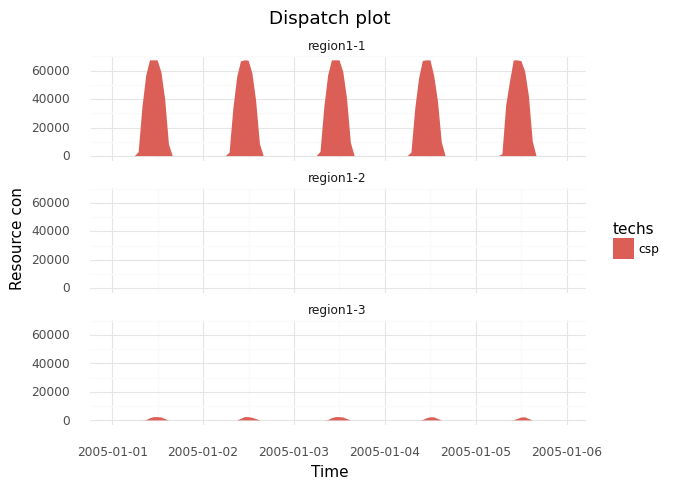

<ggplot: (8749658859921)>

In [112]:
# load data
data = model.get_formatted_array("resource_con", index_format="multiindex").to_dataframe().reset_index()
print(data.head())

# facet regions
print(data.head())
(
    pn.ggplot(data, pn.aes(x="timesteps", y="resource_con", fill="techs"))
    + pn.geom_area(position="stack")
    + pn.facet_wrap("locs", nrow=3)
    + pn.theme_minimal()
    + pn.labs(x="Time", y="Resource con", title="Dispatch plot")
)

        locs techs           timesteps  resource_con
0  region1-1   csp 2005-01-01 00:00:00           0.0
1  region1-1   csp 2005-01-01 01:00:00           0.0
2  region1-1   csp 2005-01-01 02:00:00           0.0
3  region1-1   csp 2005-01-01 03:00:00           0.0
4  region1-1   csp 2005-01-01 04:00:00           0.0


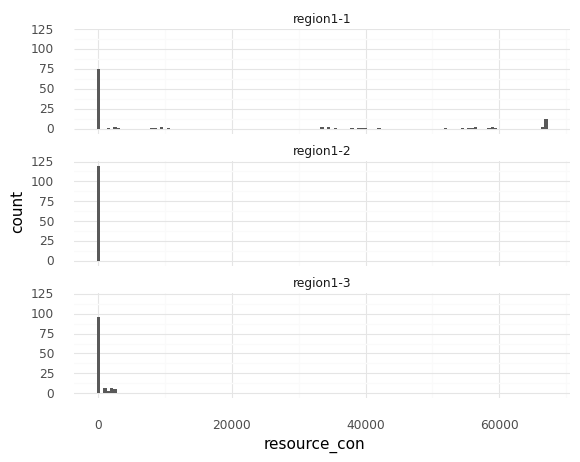

<ggplot: (8749643144409)>

In [121]:
# Load histogram
print(data.head())
(
    pn.ggplot(data, pn.aes(x="resource_con"))
    + pn.geom_histogram(binwidth=500)
    + pn.facet_wrap("locs", nrow=3)
    + pn.theme_minimal()
)

        locs techs           timesteps  resource_con
0  region1-1   csp 2005-01-01 00:00:00           0.0
1  region1-1   csp 2005-01-01 01:00:00           0.0
2  region1-1   csp 2005-01-01 02:00:00           0.0
3  region1-1   csp 2005-01-01 03:00:00           0.0
4  region1-1   csp 2005-01-01 04:00:00           0.0


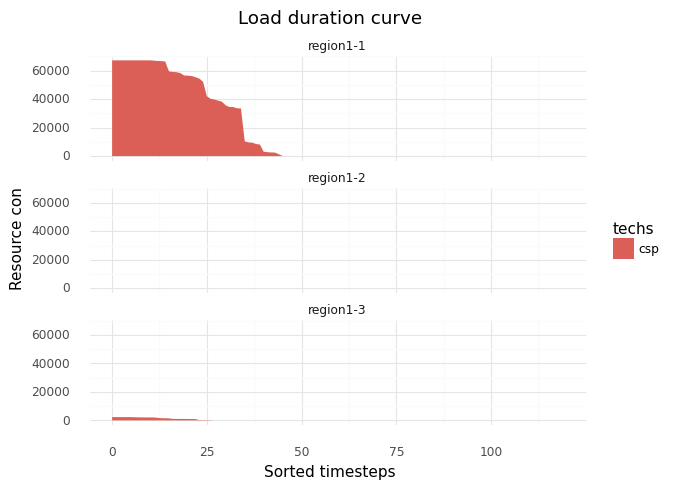

<ggplot: (8749657909402)>

In [ ]:
# Load duration curve plot

# load data
data = model.get_formatted_array("resource_con", index_format="multiindex").to_dataframe().reset_index()
print(data.head())

# load duration: Drop timesteps and sort by resource_con
data = data.drop(columns=["timesteps"])
data = data.groupby(["locs", "techs"], sort=False).apply(lambda x: x.sort_values("resource_con", ascending=False).reset_index(drop=True))
data = data.droplevel(level=["locs", "techs"], axis=0)

# facet regions
(
    pn.ggplot(data, pn.aes(x=data.index, y="resource_con", fill="techs"))
    + pn.geom_area(position="stack")
    + pn.facet_wrap("locs", nrow=3)
    + pn.theme_minimal()
    + pn.labs(x="Sorted timesteps", y="Resource con", title="Load duration curve")
)

In [99]:
data = model.get_formatted_array("energy_cap", index_format="multiindex").to_dataframe().reset_index()
data

,locs,techs,energy_cap
0,region1,free_transmission:region1-3,2280.3859
1,region1-3,csp,2533.7621
2,region2,demand_power,2909.8360
3,region1,ccgt,30000.0000
4,region1-1,free_transmission:region1,9000.0000
5,region1,free_transmission:region1-1,9000.0000
6,region1-2,csp,0.0000
7,region1-1,csp,10000.0000
8,region1-2,free_transmission:region1,0.0000
9,region1,ac_transmission:region2,3230.4729


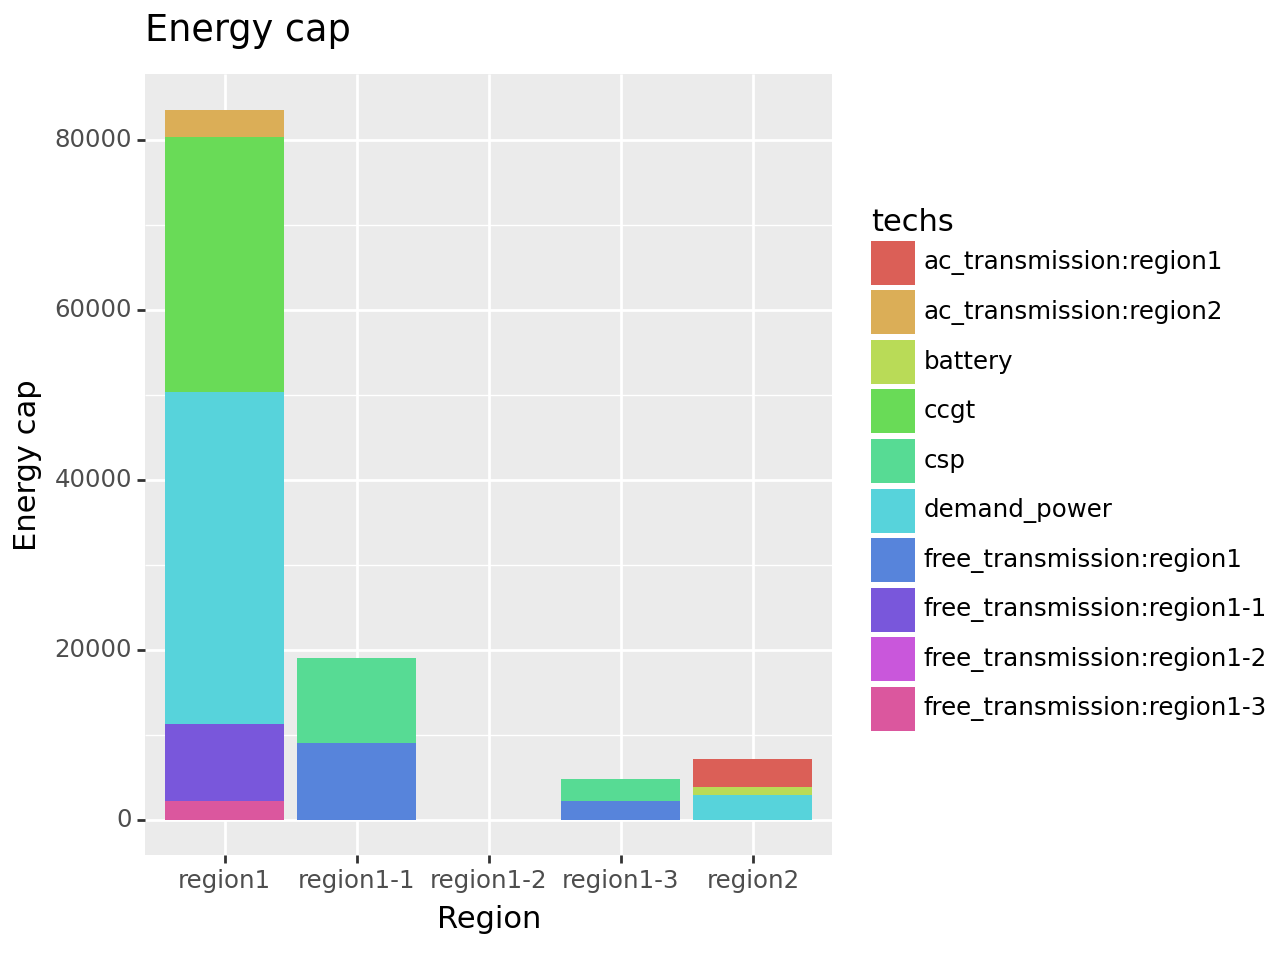

<Figure Size: (640 x 480)>

In [100]:
(
    pn.ggplot(data)
    + pn.geom_col(pn.aes(x="locs", y="energy_cap", fill="techs"))
    + pn.labs(x="Region", y="Energy cap", title="Energy cap")
)
# TODO: assign colors
# TODO: Drop transmission or color them similarly
# TODO: Handle units
# TODO: Map labels to names

In [102]:
model.inputs.colors

<xarray.DataArray 'colors' (techs: 12)>
array(['#8465A9', nan, nan, '#3B61E3', '#E37A72', '#F9CF22', '#072486',
       '#6783E3', nan, nan, nan, nan], dtype=object)
Coordinates:
  * techs    (techs) object 'ac_transmission' ... 'free_transmission:region1-3'
Attributes:
    is_result:  0